<div class="alert alert-info">
    
➡️ Make sure that you have read the **[rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins)** and the **[policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating)** before starting with this lab.

➡️ Make sure you fill in any cells (and _only_ those cells) that say **`YOUR CODE HERE`** or **YOUR ANSWER HERE**, and do _not_ modify any of the other cells.

➡️ **Before you submit your lab, make sure everything runs as expected.** For this, _restart the kernel_ and _run all cells_ from top to bottom. In Jupyter Notebook version 7 or higher, you can do this via "Run$\rightarrow$Restart Kernel and Run All Cells..." in the menu (or the "⏩" button in the toolbar).

</div>

# L2: Text classification

Text classification is the task of sorting text documents into predefined classes. The concrete problem you will be working on in this lab is the classification of texts with respect to their political affiliation. The specific texts you are going to classify are speeches held in the [Riksdag](https://www.riksdagen.se/en/), the Swedish national legislature.

In [1]:
%matplotlib inline

## Data set

The raw data for this lab comes from [The Riksdag’s Open Data](https://data.riksdagen.se/in-english/). We have tokenized the speeches and put them into two compressed [JSON](https://en.wikipedia.org/wiki/JSON) files:

* `speeches-201718.json.bz2` (speeches from the 2017/2018 parliamentary session)
* `speeches-201819.json.bz2` (ditto, from the 2018/2019 session)

We start by loading these files into two separate data frames.

In [2]:
import pandas as pd
import bz2

with bz2.open('speeches-201718.json.bz2') as source:
    speeches_201718 = pd.read_json(source)

with bz2.open('speeches-201819.json.bz2') as source:
    speeches_201819 = pd.read_json(source)

When you inspect the two data frames, you can see that there are three labelled columns: `id` (the official speech ID), `words` (the space-separated words of the speech), and `party` (the party of the speaker, represented by its customary abbreviation).

In [3]:
speeches_201718.head()

,id,words,party
0,H5-002-004,eders majestäter eders kungliga högheter herr ...,S
1,H5-003-001,aktuell debatt om situationen för ensamkommand...,V
2,H5-003-002,herr talman och ledamöter jag vill börja med a...,S
3,H5-003-003,herr talman åhörare den här debatten handlar a...,M
4,H5-003-004,herr talman ansvar och rättssäkerhet är två or...,SD


Throughout the lab, we will be using the speeches from 2017/2018 as our training data, and the speeches from 2018/2019 as our test data.

In [4]:
training_data, test_data = speeches_201718, speeches_201819

For later reference, we store the sorted list of party abbreviations.

In [5]:
parties = sorted(training_data['party'].unique())
print(parties)

['C', 'KD', 'L', 'M', 'MP', 'S', 'SD', 'V']


## Problem 1: Visualization

Your first task is to get to know the data better by producing a simple visualization.

If you are not familiar with the Swedish political system and the parties represented in the Riksdag in particular, then we suggest that you have a look at the Wikipedia article about the [2018 Swedish general election](https://en.wikipedia.org/wiki/2018_Swedish_general_election).

For the lab, we ask you to compare the two data frames with respect to the distribution of the speeches over the different parties. **Write code to generate two bar plots that visualize this information**, one for the 2017/2018 speeches and one for the 2018/2019 speeches. Inspect the two plots, and compare them

* to each other
* to the results of the 2014 and the 2018 general elections

Summarize your observations in a short text in the cell below.

**Tip:** If you need help with creating bar plots, [Bar Plot using Pandas](https://dfrieds.com/data-visualizations/bar-plot-python-pandas) provides a useful tutorial.

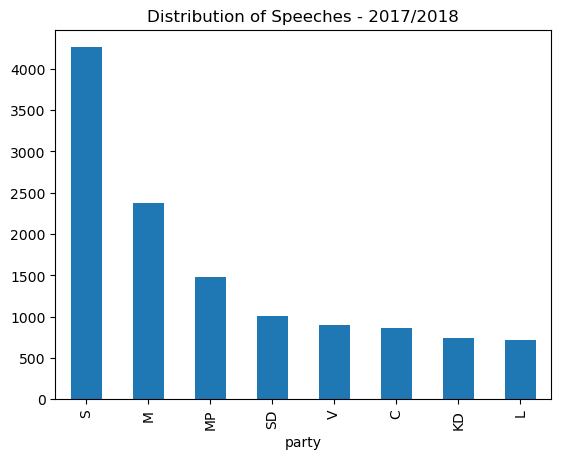

In [6]:
"""Produce a plot for the 2017/2018 speeches."""
import matplotlib.pyplot as plt

speeches_201718['party'].value_counts().plot(kind='bar')
plt.title('Distribution of Speeches - 2017/2018')
plt.show()

#raise NotImplementedError()

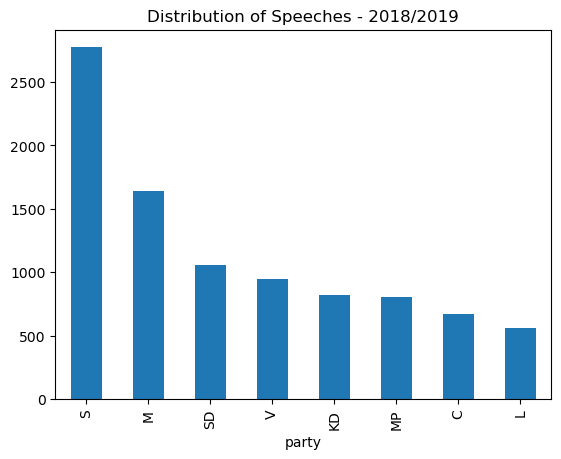

In [7]:
"""Produce a plot for the 2018/2019 speeches."""
# YOUR CODE HERE
speeches_201819['party'].value_counts().plot(kind='bar')
plt.title('Distribution of Speeches - 2018/2019')
plt.show()
# raise NotImplementedError()

**Summarize your observations!**

From the above bar plots, it's clear that there's an uneven distribution of speeches among political parties. In 2017/2018, parties M, S, and MP stood out, delivering a lot more speeches than the others. In 2018/2019, parties S, M, and SD are leading, with other parties giving fewer speeches. Notably, throughout both periods, M and S consistently had the most speeches, showing they actively participated in expressing their views.

## Problem 2: Naive Bayes classifier

You are now ready to train and evaluate a classifier. More specifically, we ask you to train a [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) classifier. You will have to

1. vectorize the speeches in the training data
2. instantiate and fit the Naive Bayes model
3. evaluate the model on the test data

The scikit-learn library provides a convenience class [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that allows you to solve the first two tasks with very compact code. For the evaluation you can use the function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which will report per-class precision, recall and F1, as well as overall accuracy.

**Write code to produce a Multinomial Naive Bayes classifier as described above and report its performance on the test data!**

In [8]:
# YOUR CODE HERE
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = make_pipeline(CountVectorizer(), MultinomialNB())

clf.fit(training_data['words'], training_data['party'])

y_pred = clf.predict(test_data['words'])
target_names = training_data['party'].unique()
print(classification_report(test_data['party'], y_pred, target_names=target_names))

#raise NotImplementedError()

              precision    recall  f1-score   support

           S       0.63      0.04      0.07       671
           V       0.70      0.02      0.03       821
           M       0.92      0.02      0.04       560
          SD       0.36      0.68      0.47      1644
          MP       0.36      0.25      0.29       809
           C       0.46      0.84      0.59      2773
           L       0.57      0.12      0.20      1060
          KD       0.59      0.15      0.24       950

    accuracy                           0.43      9288
   macro avg       0.57      0.26      0.24      9288
weighted avg       0.52      0.43      0.34      9288



Would you have expected the results that you got?

The results obtained from the above Multinomial Naive Bayes classifier were somewhat expected. The accuracy of 0.43 suggests that the model's predictions are not highly accurate. The precision, recall, and F1-score metrics vary across parties. Some parties, like 'C' and 'SD', show relatively higher precision and recall, while others, like 'S' and 'V', have lower scores. The uneven distribution of speeches among parties seems to affect the model's performance, especially for parties with fewer speeches

## Problem 3: Baselines

Evaluation metrics such as accuracy should not be understood as absolute measures of performance, but should be used only to compare different classifiers. When other classifiers are not available, a simple baseline is a classifier that generates predictions by random sampling, respecting the training set&rsquo;s class distribution. This baseline is implemented by the class [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). 

**Write code to fit a random baseline on the training data and report its performance on the test data!**

In [9]:
# YOUR CODE HERE

from sklearn.dummy import DummyClassifier

# Instantiating and fitting a Stratified Dummy Classifier
dummy_clf1 = DummyClassifier(strategy="stratified")
dummy_clf1.fit(training_data['words'], training_data['party'])

# Evaluating and printing the accuracy
accuracy_dummy_1= dummy_clf1.score(test_data['words'],test_data['party'])

print(f"Accuracy of the Stratified Dummy Classifier: {accuracy_dummy_1:.4}")
#raise NotImplementedError()

Accuracy of the Stratified Dummy Classifier: 0.1738


An even dumber baseline is to predict, for every document, that class which appears most often in the training data. This baseline is also called the most frequent class baseline.

**Write code to fit the most-frequent-class baseline on the training data and report its performance on the test data!**

In [10]:
# YOUR CODE HERE

# Instantiating and fitting a Most Frequent Dummy Classifier
dummy_clf2 = DummyClassifier(strategy="most_frequent")
dummy_clf2.fit(training_data['words'], training_data['party'])

# Evaluating and printing the accuracy
accuracy_dummy_2= dummy_clf2.score(test_data['words'],test_data['party'])
print(f"Accuracy of the Most Frequent Dummy Classifier: {accuracy_dummy_2:.4}")
#raise NotImplementedError()

Accuracy of the Most Frequent Dummy Classifier: 0.2986


## Problem 4: Creating a balanced data set

As you saw in Problem&nbsp;1, the distribution of the speeches over the eight different parties (classes) is imbalanced. One technique used to alleviate this is **undersampling**, in which one randomly removes samples from over-represented classes until all classes are represented with the same number of samples.

Implement undersampling to create a balanced subset of the training data. Rerun the evaluation from Problem&nbsp;2 on the balanced data and compare the results. Summarise your results in a short text.

**Hint:** Your balanced subset should consist of 5,752 speeches.

**Write code to implement undersampling with the classifier from Problem 2 and report its performance on the test data!**

In [11]:
# YOUR CODE HERE
import numpy as np


# Initializing an empty array to store indices to be removed
ind_to_remove = np.array([])

for party_name in training_data['party'].unique():
    
    # Filtering data for the current party
    filt_dat = training_data[training_data['party']==party_name]

    # Randomly choose indices to be removed to balance the dataset
    rand_indices = np.random.choice(filt_dat.index, size=filt_dat.shape[0]-719, replace=False)

    # Append the selected indices to the array
    ind_to_remove = np.append(ind_to_remove,rand_indices)

# Creating a new training dataset by dropping the selected indices
new_training_data = training_data.drop(ind_to_remove)

print(f"Shape of balanced dataset is {new_training_data.shape}")

Shape of balanced dataset is (5752, 3)


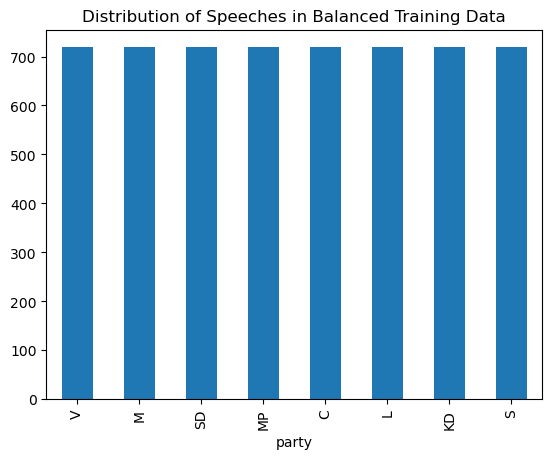

In [12]:
new_training_data['party'].value_counts().plot(kind='bar')
plt.title('Distribution of Speeches in Balanced Training Data')
plt.show()

In [13]:
# Creating a pipeline with Multinomial Naive Bayes classifier
clf_new = make_pipeline(CountVectorizer(), MultinomialNB())

# Fit the classifier on the balanced training data
clf_new.fit(new_training_data['words'], new_training_data['party'])

# Making predictions on the test data and printing model's performance
y_pred_new = clf_new.predict(test_data['words'])
target_names = new_training_data['party'].unique()
print(classification_report(test_data['party'], y_pred_new, target_names=target_names))

              precision    recall  f1-score   support

           V       0.30      0.44      0.36       671
           M       0.29      0.39      0.34       821
          SD       0.27      0.47      0.35       560
          MP       0.41      0.47      0.44      1644
           C       0.34      0.36      0.35       809
           L       0.80      0.32      0.46      2773
          KD       0.45      0.43      0.44      1060
           S       0.38      0.55      0.45       950

    accuracy                           0.41      9288
   macro avg       0.41      0.43      0.40      9288
weighted avg       0.50      0.41      0.42      9288



**Provide a brief summary of the results.**

After undersampling to create a balanced dataset, the model's accuracy slightly dropped to 0.41. Changes in precision, recall, and F1-score for each party indicate the impact of class balancing. Balancing the dataset affected the model's ability to predict on the minority classes, with precision and recall decreasing for most classes. This suggests a trade-off in overall performance for achieving class balance.

## Problem 5: Confusion matrix

A **confusion matrix** is a specific table that is useful when analysing the performance of a classifier. In this table, both the rows and the columns correspond to classes, and each cell $(i, j)$ states how many times a sample with gold-standard class $i$ was predicted as belonging to class $j$.

In scitkit-learn, the confusion matrix of a classifier is computed by the function [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). To generate a visual representation, you can use [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html).

Your task is to use the confusion matrix in order to find, for each given party $p$ in the Riksdag, that other party $p'$ which the classifier that you trained in Problem&nbsp;4 most often confuses with $p$ when it predicts the party of a speaker.

**Write code to display/plot the confusion matrix for the classifier from Problem 4 as evaluated on the test data!**

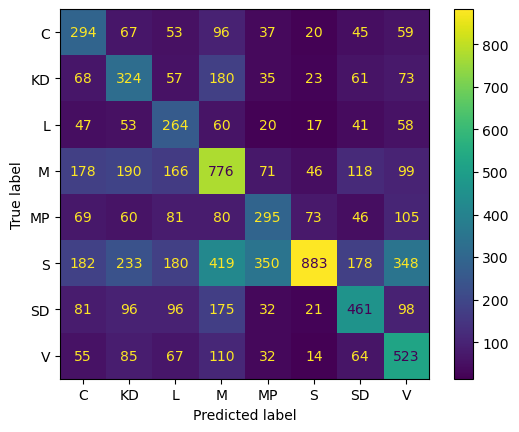

In [14]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(test_data['party'], y_pred_new, labels=clf_new.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_new.classes_)
disp.plot()
plt.show()
#raise NotImplementedError()

**Write code that, for each party $p$, print the party most often confused with $p$ by the classifier from Problem 4!**

In [15]:
# YOUR CODE HERE
for i in range (cm.shape[0]):
    class_vec = cm[i,:]
    class_vec[i]= 0
    print(f"Party '{clf_new.classes_[i]}' is most confused with party '{clf_new.classes_[np.argmax(class_vec)]}' ")
#raise NotImplementedError()

Party 'C' is most confused with party 'M' 
Party 'KD' is most confused with party 'M' 
Party 'L' is most confused with party 'M' 
Party 'M' is most confused with party 'KD' 
Party 'MP' is most confused with party 'V' 
Party 'S' is most confused with party 'M' 
Party 'SD' is most confused with party 'M' 
Party 'V' is most confused with party 'M' 


Take a minute to reflect on whether your results make sense.

The results match what we expected. Making the dataset balanced made the model work better, as shown by better accuracy on the main parts of the confusion matrix. There are small differences, especially for parties like 'M,' which could mean there are still some challenges or biases. In general, the improved classification on the balanced data shows that the model is better at understanding different political parties.

## Problem 6: Grid search

Until now, you have been using the vectorizer and the Naive Bayes classifier with their default hyperparameters. When working with real-world applications, you would want to find settings for the hyperparameters that maximize the performance for the task at hand.

Manually tweaking the hyperparameters of the various components of a vectorizer–classifier pipeline can be cumbersome. However, scikit-learn makes it possible to run an exhaustive search for the best hyperparameters over a grid of possible values. This method is known as **grid search**.

The hyperparameters of a pipeline should never be tuned on the final test set. Instead, one should either use a separate validation set, or run cross-validation over different folds. Here we will use cross-validation.

Implement a grid search with 5-fold cross-validation to find the optimal parameters in a grid defined by the following choices for the hyperparameters:

* In the vectorizer, try a set-of-words (binary) model in addition to the default bag-of-words model (two possible parameter values).
* Also in the vectorizer, try extracting bigrams in addition to unigrams (two possible parameter values).
* In the Naive Bayes classifier, try using additive smoothing with $\alpha \in \{1, 0{.}1\}$ (two possible parameter values).

Use the class [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from the scikit-learn library.

**Write code to perform grid search, then print the results of your best model, along with the parameter values that yielded these results.**

In [16]:
# YOUR CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# A pipeline with CountVectorizer and MultinomialNB
grid_pipe = Pipeline([('countvecterizer',CountVectorizer()),('NBclf',MultinomialNB())])

# A grid of parameters
grid_params = {
    'countvecterizer__binary': [True, False],
    'countvecterizer__ngram_range': [(1, 1), (1, 2)],
    'NBclf__alpha': (1, 0.1),
}

# grid search for best parameters with 5-fold cross validation
grid_search = GridSearchCV(grid_pipe, grid_params, cv=5)

gridcv_clf = grid_search.fit(training_data['words'], training_data['party'])

print(f"Best Model: {grid_search.best_estimator_}")
print(f"Best parameters: {grid_search.best_params_}")

# Printing performance (accuracy)
print(f"Accuracy of best model: {grid_search.best_score_}")

Best Model: Pipeline(steps=[('countvecterizer', CountVectorizer()),
                ('NBclf', MultinomialNB(alpha=0.1))])
Best parameters: {'NBclf__alpha': 0.1, 'countvecterizer__binary': False, 'countvecterizer__ngram_range': (1, 1)}
Accuracy of best model: 0.5859950583343673


In [17]:
# Predictions on test data
y_pred_grid = gridcv_clf.predict(test_data['words'])

# printing the performance
print(classification_report(test_data['party'], y_pred_grid, target_names=target_names))

              precision    recall  f1-score   support

           V       0.39      0.27      0.32       671
           M       0.45      0.24      0.31       821
          SD       0.37      0.26      0.30       560
          MP       0.44      0.58      0.50      1644
           C       0.32      0.46      0.38       809
           L       0.61      0.65      0.63      2773
          KD       0.49      0.43      0.45      1060
           S       0.50      0.42      0.46       950

    accuracy                           0.48      9288
   macro avg       0.45      0.41      0.42      9288
weighted avg       0.48      0.48      0.48      9288



## Problem 7: Try to improve your results

Scikit-learn makes it easy to test different vectorizer–classifier pipelines – among other things, it includes different types of logistic regression classifiers, support vector machines, and decision trees. Browse the library to see which methods are supported.

**Build a pipeline that you find interesting, and use grid search to find optimal settings for the hyperparameters. Print the results of your best model.**

In [18]:
# YOUR CODE HERE
from sklearn.svm import LinearSVC

# A pipeline with TfidfVectorizer and LinearSVC
svm_grid_pipe = Pipeline([('tfidf_vectorizer', TfidfVectorizer()),('svm_classifier', LinearSVC(dual=False))])

# Define the parameter grid for grid search
svm_grid_params = {
    'tfidf_vectorizer__binary': [True, False],          
    'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2)],  
    'svm_classifier__C': [0.1, 1.0]                     # Regularization parameter
}

# grid search for best parameters with 5-fold cross validation
svm_grid_search = GridSearchCV(svm_grid_pipe, svm_grid_params, cv=5)
gridcv_svm = svm_grid_search.fit(training_data['words'], training_data['party'])

# Printing the best model and its parameters
print(f"Best Model: {svm_grid_search.best_estimator_}")
print(f"Best parameters: {svm_grid_search.best_params_}")

# Printing performance (accuracy)
print(f"Accuracy of best model: {svm_grid_search.best_score_}")

#raise NotImplementedError()

Best Model: Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('svm_classifier', LinearSVC(dual=False))])
Best parameters: {'svm_classifier__C': 1.0, 'tfidf_vectorizer__binary': False, 'tfidf_vectorizer__ngram_range': (1, 2)}
Accuracy of best model: 0.6436027486373987


In [19]:
# Predictions on test data
y_pred_grid_svm = gridcv_svm.predict(test_data['words'])

# printing the performance
print(classification_report(test_data['party'], y_pred_grid_svm, target_names=target_names))

              precision    recall  f1-score   support

           V       0.60      0.33      0.43       671
           M       0.64      0.23      0.33       821
          SD       0.59      0.29      0.39       560
          MP       0.48      0.64      0.55      1644
           C       0.44      0.36      0.39       809
           L       0.56      0.85      0.67      2773
          KD       0.63      0.44      0.52      1060
           S       0.68      0.37      0.48       950

    accuracy                           0.55      9288
   macro avg       0.58      0.44      0.47      9288
weighted avg       0.57      0.55      0.52      9288



**Congratulations on finishing this lab! 👍**

<div class="alert alert-info">
    
➡️ Don't forget to **test that everything runs as expected** before you submit!

</div>